# Домашнее задание №2
*Задание выполнил* **Чащин Артем Максимович**

*Курс:* **3**, *группа:* **МФТИ-1**

**[GitHub](https://github.com/alexvilno/PSU_TIMESERIES/tree/HW2)**

**[Telegram](https://t.me/artemchashchin)**

## Оглавление
* [Импорт данных](#import)
* [Визуализация выборки](#visual)
* [Разложение ряда на компоненты](#decomposing)


### Импорт данных <a id="import"></a>

In [86]:
import os
import pandas as pd
import numpy as np

from os import path
from matplotlib import pyplot as plt
from dotenv import load_dotenv

In [87]:
load_dotenv(dotenv_path='../.env')

True

Импортируем данные и посмотрим *описательную статистику* выборки

In [88]:
file_path = os.getenv('PATH_TO_DATA')

sales_df = pd.read_csv(path.join(os.sep, file_path, 'data.csv'))
sales_df.describe()

,Unnamed: 0,x
count,120.000000,120.000000
mean,60.500000,713.749200
std,34.785054,174.050535
min,1.000000,215.187000
25%,30.750000,633.284000
50%,60.500000,733.300000
75%,90.250000,833.147000
max,120.000000,1006.852000


### Визуализация выборки <a id="visual"></a>

Функция, которая добавляет легенду на график

In [89]:
def plot_assignation(axp, data, xlabel, ylabel, title1, periods):
    axp.plot(data)
    axp.set_xlabel(xlabel)
    axp.set_ylabel(ylabel)
    axp.set_title(title1)
    axp.set_xticks(np.arange(0, len(sales_df['x']) + 1, 12))
    axp.set_xticklabels(np.arange(periods + 1))

В соответсвтии с моими данными я визуализирую выборку на графике и добавляю его легенду

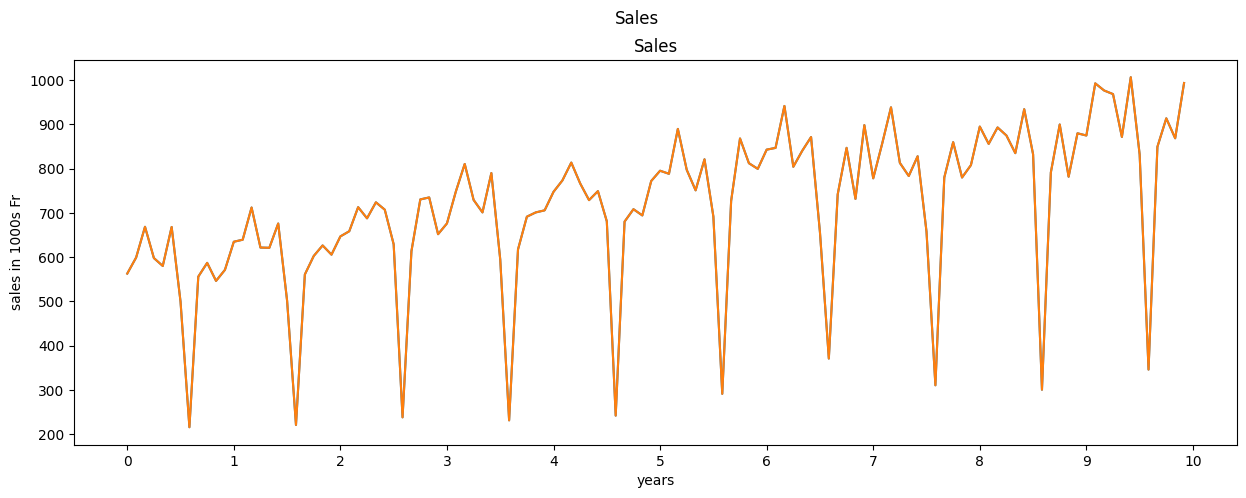

In [90]:
#выборка по 10 годам
period = 10

fig, axs = plt.subplots(1,1,figsize=(15,5))
fig.suptitle('Sales')
plot_assignation(axs, sales_df["x"], "years","sales in 1000s Fr","Sales", period)
axs.plot(sales_df['x'])

### Разложение ряда на компоненты <a id="decomposing"></a>

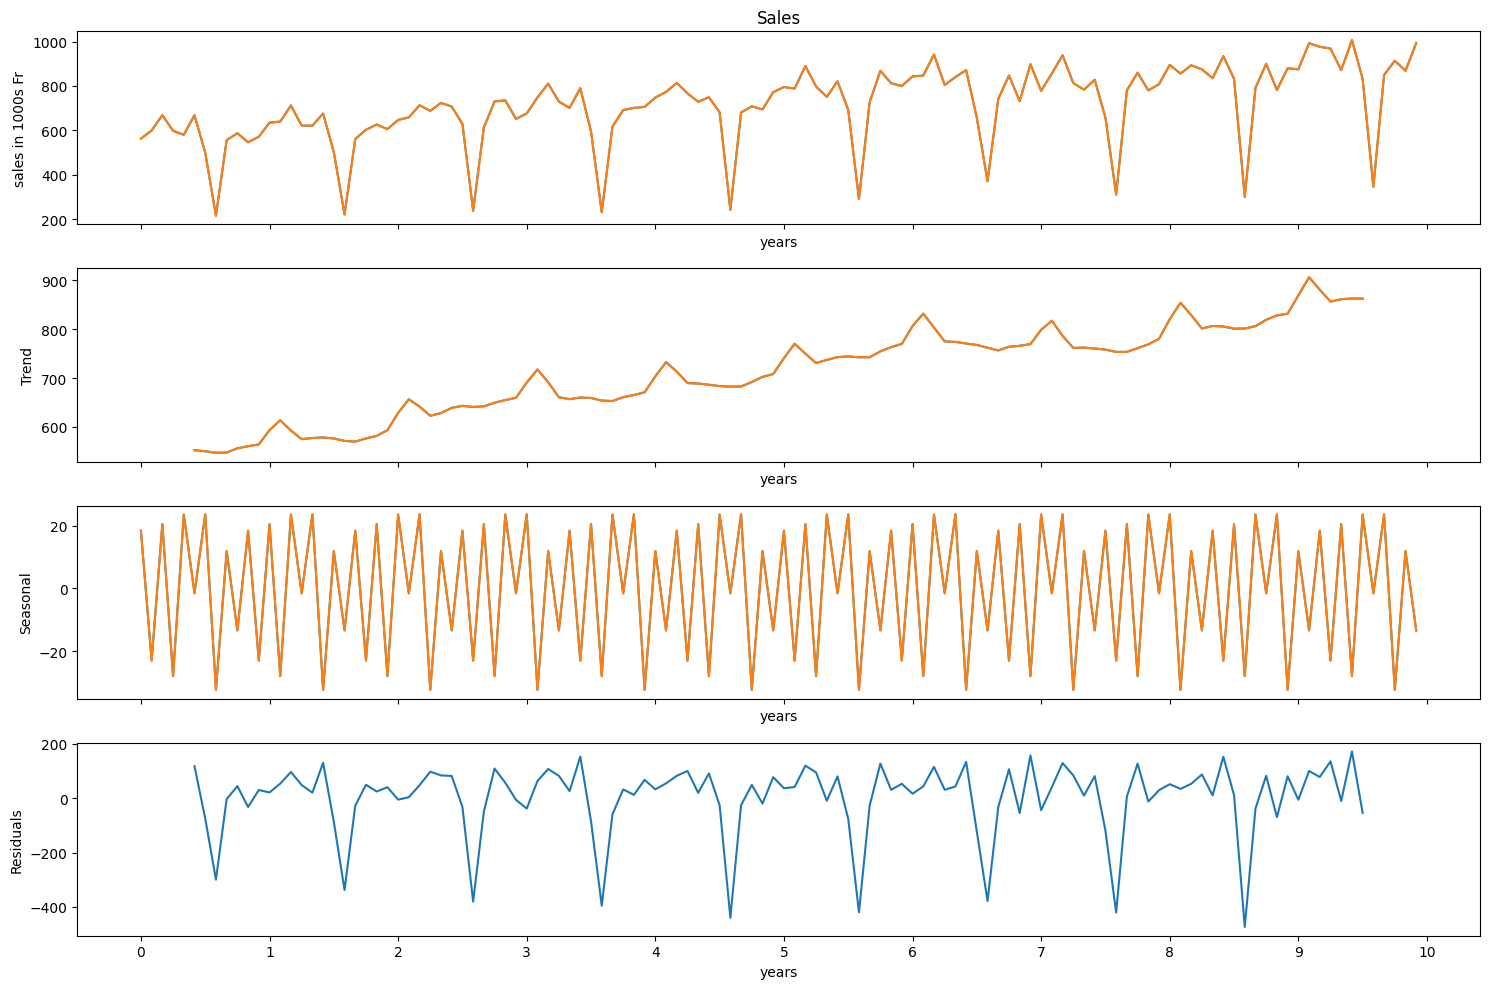

In [132]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

result = seasonal_decompose(sales_df['x'], period=10)

fig, axs = plt.subplots(4, 1, figsize=(15, 10), sharex=True)

axs[0].plot(sales_df['x'])
plot_assignation(axs[0], sales_df["x"], "years", "sales in 1000s Fr", "Sales", 10)

axs[1].plot(result.trend)
plot_assignation(axs[1], result.trend, "years", "Trend", "", period)

axs[2].plot(result.seasonal)
plot_assignation(axs[2], result.seasonal, "years", "Seasonal",  "", period)

plot_assignation(axs[3], result.resid, "years", "Residuals", "", period)


plt.tight_layout()
plt.show()

Почти мультипликативная модель временного ряда *(без шумовой компоненты)*

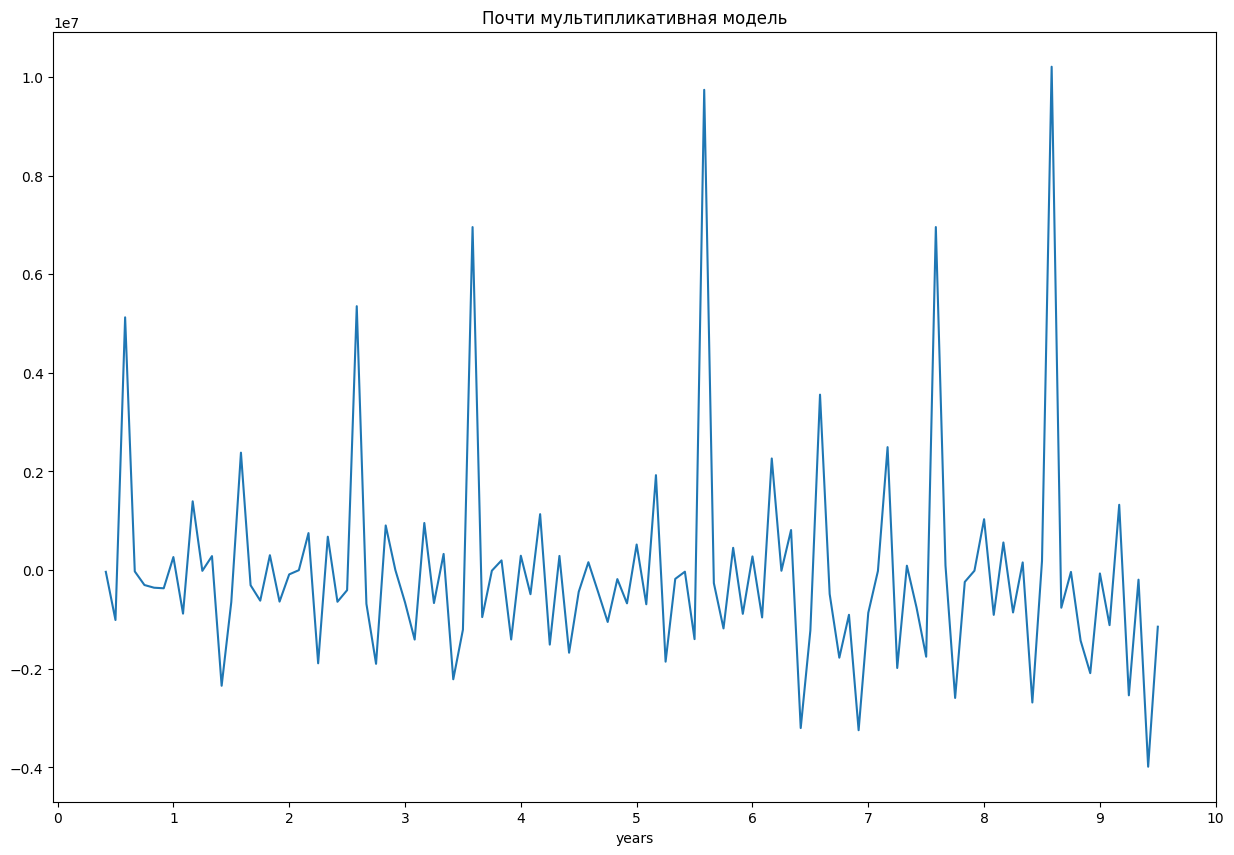

In [135]:
new_ps = result.trend*(result.seasonal + 1)*result.resid

fig, axs = plt.subplots(figsize=(15, 10))
plot_assignation(axs, new_ps, "years", "", "Почти мультипликативная модель", period)

Почти аддитивная модель временного ряда *(без шумовой компоненты)*

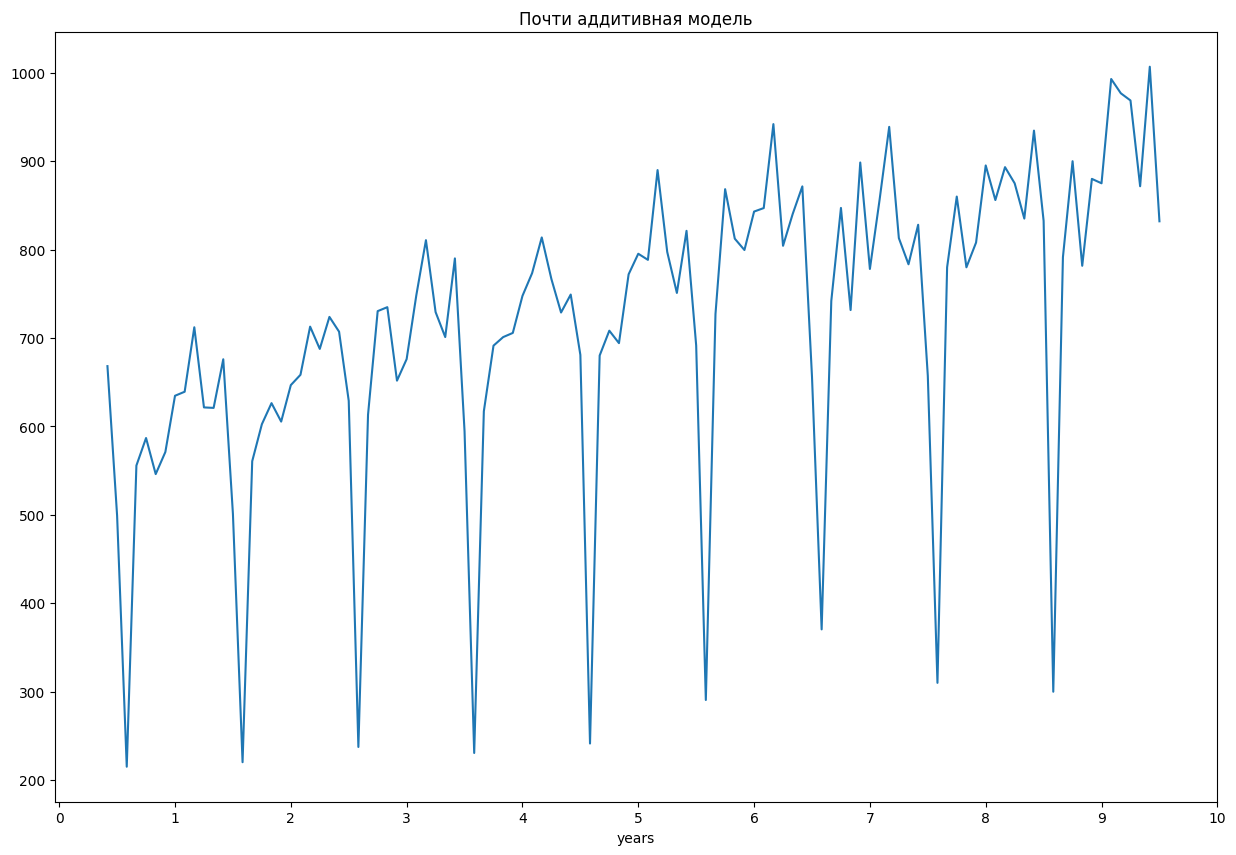

In [138]:
new_ps = result.trend + result.seasonal + result.resid

fig, axs = plt.subplots(figsize=(15, 10))
plot_assignation(axs, new_ps, "years", "", "Почти аддитивная модель", period)